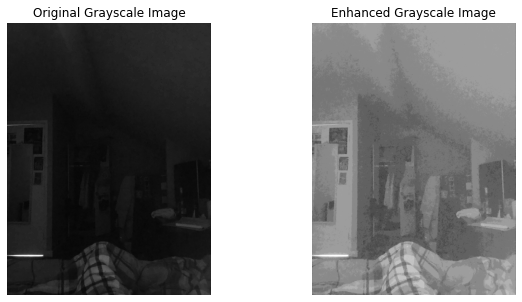

<Figure size 432x288 with 0 Axes>

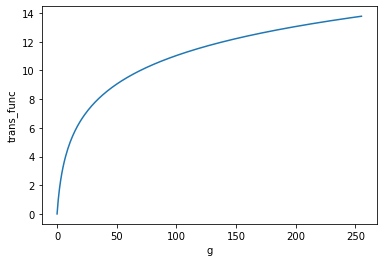

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Question i

# Step 1: Read the image using Matplotlib's imread function
filename = 'My_room.jpeg'
image_rgb = mpimg.imread(filename)

# Check if the image is in the 0-1 range, if so scale it to 0-255
if image_rgb.max() <= 1.0:
    image_rgb = (image_rgb * 255).astype(np.uint8)

# Step 2: Convert the RGB image to grayscale
# Using the formula: Gray = 0.2989*R + 0.5870*G + 0.1140*B
r, g, b = image_rgb[:, :, 0], image_rgb[:, :, 1], image_rgb[:, :, 2]
gray_image = 0.2989 * r + 0.5870 * g + 0.1140 * b

# Step 3: Perform contrast stretching on the grayscale image
# Apply non linear contrast stretching formula
alpha = 0.4
enhanced_image = (np.log10(1 + (alpha*gray_image)))/(np.log10(1 + alpha))

# Step 4: Convert images to uint8 for display
gray_image_display = gray_image.astype(np.uint8)
enhanced_image_display = enhanced_image.astype(np.uint8)

# Step 5: Display the original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(gray_image_display, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image_display, cmap='gray')
axes[1].set_title('Enhanced Grayscale Image')
axes[1].axis('off')

plt.show()


#Step 6: Showing plot of transmission function
x = np.linspace(0,255,256)
trans_func = (np.log10(1 + (alpha*x)))/(np.log10(1 + alpha))
plt.plot(x,trans_func)
plt.xlabel("g")
plt.ylabel("trans_func")
plt.figure()
       



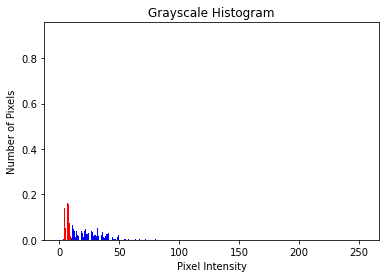

In [3]:
#Step 7: show grayscale histogram for unedited and enhanced image 
bins = 30
plt.hist(gray_image,bins,facecolor ='blue', density = True)
plt.hist(enhanced_image,bins,facecolor ='red', density = True)
# label the x-axis
plt.xlabel('Pixel Intensity')
# label the y-axis
plt.ylabel('Number of Pixels')
# display the title
plt.title('Grayscale Histogram')
plt.xlim(0,80)
plt.ylim(0,0.60)
plt.show()

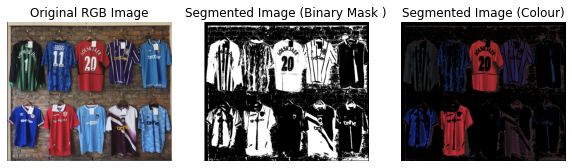

In [5]:
#Question ii
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 1: Read the image using Matplotlib's imread function
filename_2 = 'Shirt wall.png'
image_rgb_2 = mpimg.imread(filename_2)

# Check if the image is in the 0-1 range, if so scale it to 0-255
if image_rgb_2.max() <= 1.0:
    image_rgb_2 = (image_rgb_2 * 255).astype(np.uint8)
image_2_segment_binary = image_rgb_2.copy()
image_2_segment_colour = image_rgb_2.copy()

#Defining the red green and blue channels for the two different types of segmentation
r, g, b = image_2_segment_binary[:, :, 0], image_2_segment_binary[:, :, 1], image_2_segment_binary[:, :, 2]
r2, g2, b2 = image_2_segment_colour[:, :, 0], image_2_segment_colour[:, :, 1], image_2_segment_colour[:, :, 2]

#Binary mask where all pixels within 'red region threshold (RRT)' are set to white and all else set to black
for i in range(image_2_segment_binary.shape[0]):
    for j in range(image_2_segment_binary.shape[1]):
        if r[i,j] < 250 and g[i,j] > 50 and b[i,j] > 30:
            r [i,j]= 0
            g [i,j]= 0
            b [i,j]= 0
        else:
            r [i,j]= 255
            g [i,j]= 255
            b [i,j]= 255

#Similar to binary mask except the pixels within the RRT are no longer set to white so that,
#, information about their colour remains 
for i in range(image_2_segment_colour.shape[0]):
    for j in range(image_2_segment_colour.shape[1]):
        if r2[i,j] < 250 and g2[i,j] > 50 and b2[i,j] > 30:
            r2 [i,j]= 0
            g2 [i,j]= 0
            b2 [i,j]= 0


# Step 4: Convert images to uint8 for display
image_rgb_2_display = image_rgb_2.astype(np.uint8)
image_2_segment_binary_display = image_2_segment_binary.astype(np.uint8)
image_2_segment_colour_display = image_2_segment_colour.astype(np.uint8)

# Step 5: Display the original and enhanced images
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(image_rgb_2_display)
axes[0].set_title('Original RGB Image')
axes[0].axis('off')

axes[1].imshow(image_2_segment_binary_display)
axes[1].set_title('Segmented Image (Binary Mask)')
axes[1].axis('off')

axes[2].imshow(image_2_segment_colour_display)
axes[2].set_title('Segmented Image (Colour)')
axes[2].axis('off')

plt.show()

#note for self include code for segmenting the different colours i.e red and green too

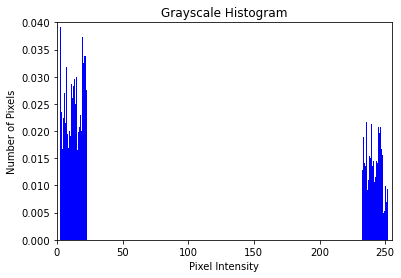

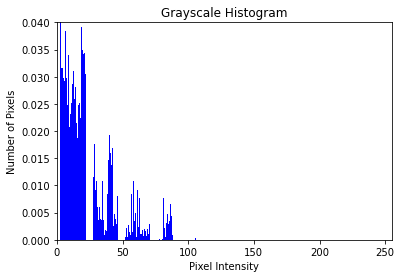

In [6]:
#Displays greyscale histogram plots for binary mask and colour case to show the different,
#, effect each case has

gray_image_binary = 0.2989 * r + 0.5870 * g + 0.1140 * b
gray_image_colour = 0.2989 * r2 + 0.5870 * g2 + 0.1140 * b2
bins = 20

plt.hist(gray_image_binary,bins,facecolor ='blue', density = True)

# label the x-axis
plt.xlabel('Pixel Intensity')
# label the y-axis
plt.ylabel('Number of Pixels')
# display the title
plt.title('Grayscale Histogram')
plt.xlim(0,255)
plt.ylim(0,0.04)
plt.show()
plt.figure()

plt.hist(gray_image_colour,bins,facecolor ='blue', density = True)

# label the x-axis
plt.xlabel('Pixel Intensity')
# label the y-axis
plt.ylabel('Number of Pixels')
# display the title
plt.title('Grayscale Histogram')
plt.xlim(0,255)
plt.ylim(0,0.04)
plt.show()

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
32.9967
[[33.1107 32.9967 32.9967]
 [32.9967 32.9967 33.2956]
 [32.8118 33.5837 32.8118]]
0.18490000000000606
(1482, 1478)


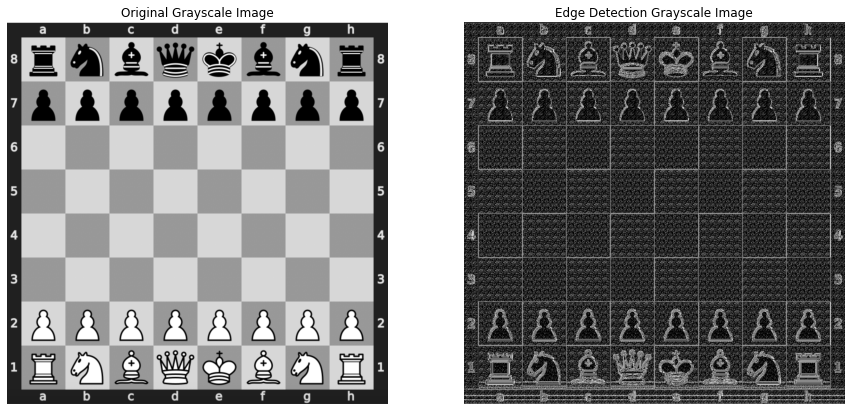

In [20]:
#Question iii
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 1: Read the image using Matplotlib's imread function
filename_3 = 'Chessboard(online).png'
image_rgb_3 = mpimg.imread(filename_3)


# Check if the image is in the 0-1 range, if so scale it to 0-255
if image_rgb_3.max() <= 1.0:
    image_rgb_3 = (image_rgb_3 * 255).astype(np.uint8)
    
# Step 2: Convert the RGB image to grayscale
# Using the formula: Gray = 0.2989*R + 0.5870*G + 0.1140*B
r, g, b = image_rgb_3[:, :, 0], image_rgb_3[:, :, 1], image_rgb_3[:, :, 2]
gray_image_3 = 0.2989 * r + 0.5870 * g + 0.1140 * b

#Step 3 create and apply kernel

#Creating kernel that detects horizontal edges
d = 3
kernel_h = np.zeros([d,d])
for i in range(0,d):
    for j in range(0,d):
        if i == 0:
            kernel_h[i,j] = -1
        if i == 2:
            kernel_h[i,j] = 1
            
#Creating kernel that detects verticle edges
kernel_v = np.zeros([d,d])
for i in range(0,d):
    for j in range(0,d):
        if j == 0:
            kernel_v[i,j] = -1
        if j == 2:
            kernel_v[i,j] = 1
            
print(kernel_h)
print(kernel_v)

#Testing code on one pixel before scaling it up to work on whole image
y = 46
x = 200

old_value = gray_image_3[y,x]
print(old_value)

#Get the region

region = gray_image_3[y-d//2:y+d//2+1,x-d//2:x+d//2+1] #Gives 3x3 region centred on text pixel
print(region)

#Output the value for one pixel
output_value = 0

for i in range(d):
    for j in range(d):
        output_value += region[i,j]*kernel_v[i,j]
        
print(output_value)


#Now apply previous code to whole image rather than just one pixel
enhanced_image_3 = np.zeros(gray_image_3.shape)

#d//2 gives floor of d/2 which rounds 1.5 down to 1 
#it is used to ensure that when the code approaches the borders,
#, of the image it does not try to sample indices outside of the image

for y in range(d//2, gray_image_3.shape[0]-d//2):
    for x in range(d//2, gray_image_3.shape[1]-d//2):
        region = gray_image_3[y-d//2:y+d//2+1,x-d//2:x+d//2+1]
        for i in range(0,d):
            for j in range(0,d):
                enhanced_image_3[y,x]  += region[i,j]*(kernel_h[i,j]+kernel_v[i,j])
        
# Step 4: Convert images to uint8 for display
gray_image_display_3 = gray_image_3.astype(np.uint8)
enhanced_image_display_3 = enhanced_image_3.astype(np.uint8)

# Step 5: Display the original and enhanced images
fig, axes = plt.subplots(1, 2,  figsize=(15, 8))

axes[0].imshow(gray_image_display_3, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image_display_3, cmap='gray')
axes[1].set_title('Edge Detection Grayscale Image')
axes[1].axis('off')



plt.show()


(706, 1402)
